<a href="https://colab.research.google.com/github/mkhalil7625/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Copy_of_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [36]:
# Confidence Intervals:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
#get the data set
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']
#read the data replace missing data with null values
house = pd.read_csv(url, header=None, names=column_headers, na_values='?')
house.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [11]:
#replace y/n with 1/0
house = house.replace({'y':1,'n':0})
house.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [12]:
house.shape

(435, 17)

In [13]:
#separate the dataframe into 2 dataframe; rep and dem
rep = house[house['party']=='republican']
dem = house[house['party']=='democrat']
print(rep.shape)
dem.shape

(168, 17)


(267, 17)

In [15]:
#the average voters in the dem party for the budget bill in the sample
dem['budget'].mean()

0.8884615384615384

In [34]:
#calc the 95% confidence interval on either side with stats ;

conf_int = stats.t.interval(0.95,
                            dem.shape[0]-1,#dof
                            loc=dem['budget'].mean(),#mean
                            scale = (np.std(dem['budget'], ddof = 1))/dem.shape[0] ** 0.5 #stanard error
                            )

conf_int


(0.8504564817145479, 0.9264665952085289)

In [32]:
# a cleaner way
n=len(dem['budget'])
dof=n-1#degrees of freedom
mean = np.mean(dem['budget'])#mean
sample_std = np.std(dem['budget'],ddof=1)#standard dev
std_error = sample_std/n**.5 #standard error
CI = stats.t.interval(.95,dof,loc=mean,scale=std_error)
CI

(0.8504564817145479, 0.9264665952085289)

In [52]:
#another way but we need to drop null values, how to fix?
def confidence_interval(data, confidence=0.95): 
  data=data.dropna()
  sample = np.array(data)
  sample_std_dev = np.std(sample,ddof=1)
  n=len(sample)
  standard_error = sample_std_dev/np.sqrt(n)
  t=stats.t.ppf((1+confidence)/2,n-1)
  margin_of_error = t*standard_error
  x_bar = np.mean(sample)
  lower_bound = x_bar-margin_of_error
  upper_bound = x_bar+margin_of_error

  return(lower_bound,x_bar,upper_bound)

lower, mean, upper=confidence_interval(dem['budget'])
print(mean-lower)
print(lower)
print(mean)
print(upper)
# np.array(dem['budget'])

0.03851802312746677
0.8499435153340716
0.8884615384615384
0.9269795615890052


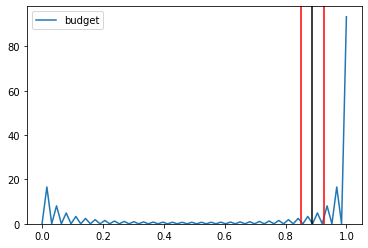

In [43]:
#plot using the data from the first method 
sns.kdeplot(dem['budget'], gridsize=50)
# dem['budget'].plot.density()

plt.axvline(x=conf_int[0], color='red')
plt.axvline(x=conf_int[1], color='red')
plt.axvline(x=dem['budget'].mean(), color='black');

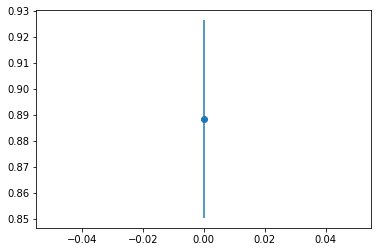

In [48]:
sample_mean=dem['budget'].mean()
margin_of_error = sample_mean-conf_int[0]

plt.errorbar(0,sample_mean,yerr=margin_of_error,fmt='o');

In [49]:
margin_of_error

0.038005056746990507

88% of democrats will vote with a Yes, with a 95% confidence interval of +/- 3.8%.

In [55]:
#Chi-squared tests:
url2='https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv'
adults= pd.read_csv(url2,na_values=' ?')
adults.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [56]:
adults.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [58]:
adults['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [59]:
adults['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [62]:
#race and Salary
observed = pd.crosstab(adults['race'],adults['salary']).values
observed

array([[  275,    36],
       [  763,   276],
       [ 2737,   387],
       [  246,    25],
       [20699,  7117]])

In [65]:
#using Scipy
stat,pvalue,dof,expected=stats.chi2_contingency(observed)
print('stat=', stat)
print('pvalue= ',pvalue)
print('dof= ',dof)
pd.DataFrame(expected)

stat= 330.9204310085741
pvalue=  2.305960610160958e-70
dof=  4


,0,1
0,236.108228,74.891772
1,788.798870,250.201130
2,2371.710943,752.289057
3,205.740610,65.259390
4,21117.641350,6698.358650


conclusion: due to test-statistic 330.9 and p-value of almost 0, I reject the null hypotheseis that race and salary are independent,
and suggest the alternative that there is an association between these two variable

In [67]:
#using numpy
observed_with_margins = pd.crosstab(adults['race'],adults['salary'],margins=True)
observed_with_margins

salary,<=50K,>50K,All
race,,,
Amer-Indian-Eskimo,275,36,311
Asian-Pac-Islander,763,276,1039
Black,2737,387,3124
Other,246,25,271
White,20699,7117,27816
All,24720,7841,32561


In [69]:
#row sums
row_sums=observed_with_margins.iloc[0:5,2].values
row_sums

array([  311,  1039,  3124,   271, 27816])

In [71]:
# column_sums
column_sums=observed_with_margins.iloc[5,0:2].values
column_sums

array([24720,  7841])

In [73]:
# total of totals
total=observed_with_margins.loc['All','All']
total

32561

In [75]:
# to get expected values
expected=[]#empty

for i in range(len(row_sums)):
  expected_row=[]
  for column in column_sums:
    expected_val=column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)


(5, 2)
[[  236.10822763    74.89177237]
 [  788.79886981   250.20113019]
 [ 2371.71094254   752.28905746]
 [  205.74060993    65.25939007]
 [21117.64135008  6698.35864992]]


In [78]:
# Calculate Degrees of Freedom
dof = (len(row_sums)-1)*(len(column_sums)-1)
print(f"Degrees of Freedom: {dof}")   

Degrees of Freedom: 4


In [80]:
#Calc Chi2
chi2=((observed-expected)**2/(expected)).sum()
chi2

330.9204310085741

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)